In [1]:
import EddyDetectionV2 as eddy
import oceanspy as ospy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.colors import SymLogNorm
from tqdm import tqdm
import ast
from matplotlib.animation import FuncAnimation, FFMpegFileWriter
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import matplotlib.colors as colors
import json
import matplotlib.cm as cm
import gsw
# from read_eddyIDRegion import load_eddyIDRegions

# Set default font size to match LaTeX document
plt.rcParams.update({
    'font.size': 11,       # Default text size
    'axes.titlesize': 10,  # Title size
    'axes.labelsize': 10,  # Axis label size
    'xtick.labelsize': 8, # X-tick label size
    'ytick.labelsize': 8, # Y-tick label size
    'legend.fontsize': 8, # Legend font size
    'figure.titlesize': 12 # Figure title size
})

config_regrid_FWT = False

# Import data

In [2]:
from pathlib import Path

def get_file_size(file_path):
    file_size_bytes = Path(file_path).stat().st_size
    if file_size_bytes < 1024:
        return f"{file_size_bytes} B"
    elif file_size_bytes < 1024**2:
        return f"{file_size_bytes / 1024:.2f} KB"
    elif file_size_bytes < 1024**3:
        return f"{file_size_bytes / 1024**2:.2f} MB"
    else:
        return f"{file_size_bytes / 1024**3:.2f} GB"

file_path = '/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/EddyAreaID.nc'
print(f"File size: {get_file_size(file_path)}")

import netCDF4 as nc

# Open NetCDF file using netCDF4
ds_nc = nc.Dataset('/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/EddyAreaID.nc')

# Extract variable data excluding coordinates
data_vars = {}
for var_name, nc_var in ds_nc.variables.items():
    if var_name not in ds_nc.dimensions:
        data_vars[var_name] = (nc_var.dimensions, np.array(nc_var))

# Extract coordinate data
coords = {}
for coord_name, nc_coord in ds_nc.dimensions.items():
    coords[coord_name] = np.array(ds_nc.variables[coord_name])

# Extract global attributes
attrs = {attr: ds_nc.getncattr(attr) for attr in ds_nc.ncattrs()}

# Create xarray Dataset with extracted information
ds_xr = xr.Dataset(data_vars=data_vars, coords=coords, attrs=attrs)

# Display the converted xarray.Dataset
print(ds_xr)

JMREI = ds_xr['EddyID'].sel(Y=slice(70, 74), X=slice(-22, 0))
display(JMREI)

File size: 2.26 GB
<xarray.Dataset> Size: 346MB
Dimensions:  (Y: 231, X: 510, time: 365)
Coordinates:
  * X        (X) float64 4kB -21.98 -21.93 -21.87 -21.82 ... 1.879 1.936 1.994
  * Y        (Y) float64 2kB 70.01 70.03 70.04 70.06 ... 74.89 74.92 74.95 74.99
  * time     (time) int64 3kB 0 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364
Data variables:
    XC       (Y, X) float64 942kB -21.98 -21.93 -21.87 ... 1.879 1.936 1.994
    YC       (Y, X) float64 942kB 70.01 70.01 70.01 70.01 ... 74.99 74.99 74.99
    Z        float64 8B -1.0
    EddyID   (time, Y, X) object 344MB '0' '0' '0' '0' '0' ... '0' '0' '0' '0'


<xarray.DataArray 'EddyID' (time: 365, Y: 198, X: 473)> Size: 273MB
array([[['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       [['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       [['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
...
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       [['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']],

       [['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ...,
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0'],
        ['0', '0', '0', ..., '0', '0', '0']]], dtype=object)
Coordinates:
  * X        (X) float64 4kB -21.98 -21.93 -21.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 2kB 70.01 70.03 70.04 70.06 ... 73.9 73.93 73.95 73.98
  * time     (time) int64 3kB 0 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364

In [3]:
JMREI = JMREI.where(JMREI != '0')
display(JMREI)

<xarray.DataArray 'EddyID' (time: 365, Y: 198, X: 473)> Size: 273MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=object)
Coordinates:
  * X        (X) float64 4kB -21.98 -21.93 -21.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 2kB 70.01 70.03 70.04 70.06 ... 73.9 73.93 73.95 73.98
  * time     (time) int64 3kB 0 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364

In [4]:
JMFZ_region = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/FWT/JMFZFWT.nc')['shelfExtended'].assign_attrs(
    units="mSv", description="Freshwater transport"
).rename('FWT_70_74N')
eddyRegion = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/Eddies_fullYear.nc')['EddyDetection'].sel(Y=slice(70,74),X=slice(-22,0))
eddyRegion.attrs = {}
eddyRegion = eddyRegion.assign_attrs(
    unit="Eddy type (1 == anti-cyclonic, 2 == cyclonic)", description="Outermost closed SSH defined eddy region"
)

depth = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/Depth_res.nc')['Depth'].sel(Y=slice(70,74),X=slice(-22,0))
depth_no_nan = depth

depth = depth.where(depth > 0, np.nan)

FWC = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/FWC_full_domain.nc')['__xarray_dataarray_variable__'].sel(Y=slice(70,74)).sel(X=slice(-22,0))
FWC = FWC.resample(time='D').mean(dim='time').rename('FWC')

area = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/rA.nc')['rA'].sel(Y=slice(70,74),X=slice(-22,0))

In [5]:
def err_resample(dataset_d):
    resampled_data = dataset_d.resample(time='ME').std()
    new_time = []
    for date in resampled_data['time'].values:
        date = pd.Timestamp(date)
        start_of_month = date.replace(day=1)
        end_of_month = (start_of_month + pd.DateOffset(months=1)) - pd.Timedelta(days=1)
        midpoint_of_month = start_of_month + (end_of_month - start_of_month) / 2
        new_time.append(midpoint_of_month)
    resampled_data['time'] = pd.to_datetime(new_time)
    return resampled_data

In [6]:
if config_regrid_FWT:    
    XC_mask = JMFZ_region.XC
    YC_mask = JMFZ_region.YC

    cond_bound = xr.ones_like(eddyRegion[0], dtype=bool)

    for x, y in zip(XC_mask, YC_mask):
        cond_bound.loc[{"X": x, "Y": y}] = False
    eddyRegion_easternboundary = eddyRegion.where(~cond_bound)

    FWT_restructure = xr.zeros_like(eddyRegion_easternboundary)

    for time,data in tqdm(enumerate(JMFZ_region),total=len(JMFZ_region),desc='Regridding'):
        for mooring in data:
            XC = mooring.XC
            YC = mooring.YC
            FWT_restructure[time].loc[{"X":XC,"Y":YC}] = mooring.values

In [7]:
if config_regrid_FWT:
    FWT_restructure = FWT_restructure.rename('Jan Mayen region FWT')
    FWT_restructure.attrs = {}
    FWT_restructure = FWT_restructure.assign_attrs(
    unit="mSv", description="Freshwater transport in milli-Sverdrup (m^3s^-1*1e-1000)"
    )
    FWT_restructure.to_netcdf('/nird/projects/NS9608K/MSc_EK/Data/FWT/JMFZFWT_regrid.nc')
else:
    FWT_restructure = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/FWT/JMFZFWT_regrid.nc')['Jan Mayen region FWT']

In [8]:
display(FWT_restructure)

<xarray.DataArray 'Jan Mayen region FWT' (time: 365, Y: 198, X: 473)> Size: 273MB
[34183710 values with dtype=float64]
Coordinates:
  * X        (X) float64 4kB -21.98 -21.93 -21.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 2kB 70.01 70.03 70.04 70.06 ... 73.9 73.93 73.95 73.98
    XC       (Y, X) float64 749kB ...
    YC       (Y, X) float64 749kB ...
  * time     (time) datetime64[ns] 3kB 2017-09-01 2017-09-02 ... 2018-08-31
    Z        float64 8B ...
Attributes:
    unit:         mSv
    description:  Freshwater transport in milli-Sverdrup (m^3s^-1*1e-1000)

(-20.0, -7.5)

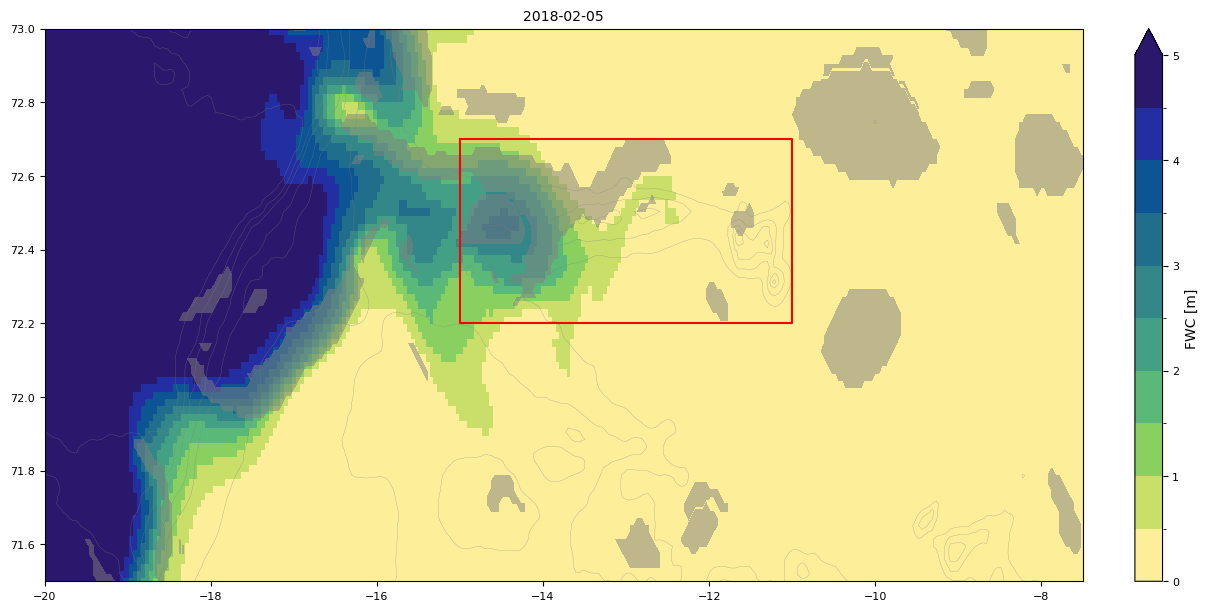

In [9]:
fig, ax = plt.subplots(
    figsize=(12,6), layout='constrained'
    #figsize=(6.2217,3), layout='constrained'
)

time = 157

bounds = np.linspace(0, 5, 11)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

ax.set_title(str(FWC.time.values[time])[0:10])

mesh = ax.pcolormesh(FWC.X,FWC.Y,FWC[time],cmap=cmo.haline_r,norm=norm)
cbar = fig.colorbar(mesh,extend='max')
cbar.set_label('FWC [m]')

lon = depth['XC']
lat = depth['YC']

land = depth_no_nan.where(depth_no_nan==0)

ax.pcolormesh(land.X,land.Y,land,cmap='Greys',vmin=-25,vmax=100,zorder=0)

# Add land contour
ax.contour(lon, lat, depth_no_nan, [0], colors='black', linewidths=0.25,zorder=0)
ax.contour(lon, lat, depth_no_nan, [300,400,500,750,1000,1500,2000], colors='grey', linewidths=0.25,alpha=0.7)

NJMR = [[-15,-11,-11,-15,-15],[72.7,72.7,72.2,72.2,72.7]]
ax.plot(NJMR[0],NJMR[1],c='red')

ax.contourf(eddyRegion.X,eddyRegion.Y,eddyRegion[time],[0,1.5],colors='grey',alpha=0.5)
ax.contourf(eddyRegion.X,eddyRegion.Y,eddyRegion[time],[3,4.5],colors='grey',alpha=0.5)

ax.set_ylim(71.5,73)
ax.set_xlim(-20,-7.5)


In [10]:
JMR_FWC = FWC.sel(Y=slice(72.2,72.7),X=slice(-15,-11))
JMR_area = area.sel(Y=slice(72.2,72.7),X=slice(-15,-11))
JMR_eddyRegion = eddyRegion.sel(Y=slice(72.2,72.7),X=slice(-15,-11))

In [11]:
JMR_FWC_Sum = JMR_FWC*JMR_area
JMR_FWC_Sum = JMR_FWC_Sum.sum(dim=['X','Y'])*10**(-9)

cond = (JMR_eddyRegion == 1)# | (JMR_eddyRegion == 4)
EJMR_FWC = JMR_FWC.where(cond)*JMR_area
EJMR_FWC = EJMR_FWC.sum(dim=['X','Y'])*10**(-9)
cond = (JMR_eddyRegion == 4)
OEJMR_FWC = JMR_FWC.where(cond)*JMR_area
OEJMR_FWC = OEJMR_FWC.sum(dim=['X','Y'])*10**(-9)

cond = (JMR_eddyRegion == 1) | (JMR_eddyRegion == 4)
CEJMR_FWC = JMR_FWC.where(cond)*JMR_area
CEJMR_FWC = CEJMR_FWC.sum(dim=['X','Y'])*10**(-9)

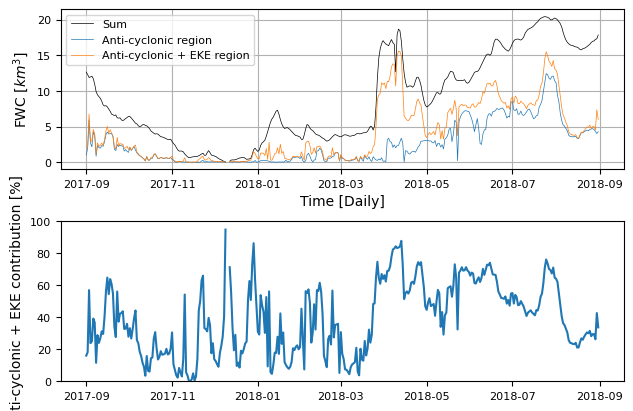

In [37]:
fig, (ax,ax2) = plt.subplots(2,1,
    figsize=(6.2217,4), layout = 'constrained'
)
test1 = CEJMR_FWC.where(JMR_FWC_Sum >= CEJMR_FWC)
test2 = JMR_FWC_Sum.where(JMR_FWC_Sum >= CEJMR_FWC)
test3 = EJMR_FWC.where(JMR_FWC_Sum >= CEJMR_FWC)

ax.plot(test2.time,test2,c='k',linewidth=0.5,label='Sum')
ax.plot(test3.time,test3,linewidth=0.5,label='Anti-cyclonic region')
# ax.plot(OEJMR_FWC.time,OEJMR_FWC,label='EKE region')
ax.plot(test1.time,test1,linewidth=0.5,label='Anti-cyclonic + EKE region')

ax.set_ylabel(f'FWC [$km^{3}$]')
ax.set_xlabel('Time [Daily]')
ax.grid()
ax.legend(loc='upper left')

ACERP = CEJMR_FWC / JMR_FWC_Sum * 100
ACERP = ACERP.where(JMR_FWC_Sum >= CEJMR_FWC)

ax2.plot(ACERP.time,ACERP)
ax2.set_ylim(0,100)
ax2.set_ylabel('Anti-cyclonic + EKE contribution [%]')

fig.savefig(f'/nird/home/ekv036/MSc/Fig/JMR_EFWC',dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', format=None,
            transparent=False, bbox_inches=None,pad_inches=0.25)

In [13]:
Eddy_area_NJMR = xr.ones_like(JMR_eddyRegion)
Eddy_area_NJMR = Eddy_area_NJMR.where((JMR_eddyRegion == 1) | (JMR_eddyRegion == 4))*JMR_area
Eddy_area_NJMR = Eddy_area_NJMR.sum(dim=['X','Y'])*10**(-6)
display(Eddy_area_NJMR)

<xarray.DataArray (time: 365)> Size: 3kB
array([ 852.39410808,  785.66548857, 2511.27133642, 1016.76874337,
       1456.1525432 , 1826.31733901, 1467.02565237,  534.56039339,
       1060.26563278,  835.52544967, 1059.02959764, 1158.25011606,
        917.07974942, 1293.16729522, 2066.20005948, 2685.16603509,
       1740.69610159, 2374.49995103, 1886.82145536, 1622.39824119,
       1051.03800511,  796.75159316, 2872.18782952, 1110.71816422,
       1514.93129871, 1529.060271  , 1688.84614017, 1519.12840668,
       1395.35249689, 1890.88432712, 1387.13571359, 1438.77793734,
       1124.23163793, 1394.88522978, 1676.52316118, 2304.71805152,
        992.29419742, 1032.69111576,  844.57402134,  707.24198051,
        454.88641908,  500.96642994,  219.10573826,  994.10411712,
        261.99465263,  404.36286615,  776.73052472, 1105.06866374,
       1502.49999598, 1662.22172469, 1240.17036767, 1033.76098468,
       1058.44168248, 1175.87491163,  943.15916911, 1171.94482972,
       1140.69845162, 1138.19133535, 1259.04106877,  839.5960325 ,
        757.50403531, 1373.73554587,  445.77313767,  265.47508701,
         73.57916269,   73.39017135,  426.6762897 ,  317.88391558,
        232.24455132,  605.94847276, 3036.29657098,  450.42430824,
         77.33894362,  411.93509734,  304.62833054,  581.80849253,
        458.69038788,  422.05020318,  439.21545077,  518.64939381,
...
       3537.18193792, 3310.02416122, 3586.6824706 , 3814.48060043,
       3558.27623907, 2970.30804964, 2880.43374121, 2819.26923343,
       2751.14948279, 2798.83577745, 2956.50872364, 2483.91952781,
       2667.16413043, 2275.99304316, 2798.54187609, 2849.25623775,
       2528.4622059 , 2954.76125524, 2735.23028138, 2381.01545359,
       2418.24362336, 2620.28763552, 2543.93489741, 2411.21954423,
       2315.62328448, 2179.49519539, 2406.00306827, 2527.71824225,
       2601.04561316, 2590.22480717, 2499.26101798, 2425.82521448,
       2678.70421515, 2663.76217196, 2850.94253867, 3213.408261  ,
       3290.46325505, 3613.54185106, 4236.00772937, 4647.2285938 ,
       4447.81657125, 4228.61825304, 4117.81250502, 3962.83594985,
       4436.43831933, 3792.25215963, 3694.6524312 , 3592.23930834,
       3097.14106777, 2591.12314522, 2236.16834047, 1923.63732876,
       1848.12511279, 1668.75087119, 1494.63511894, 1176.18246955,
       1081.26376817, 1063.24499411, 1042.19623667, 1016.64726004,
       1088.75212052,  915.64454695,  916.20203766, 1068.81714048,
       1177.47266727, 1132.81690099, 1234.09371569, 1294.76755045,
       1331.56939749, 1289.65915147, 1367.56923297, 1229.72542351,
       1314.99539063, 1379.89611017, 1164.20851038, 1908.1813699 ,
       1670.65382545])
Coordinates:
  * time     (time) datetime64[ns] 3kB 2017-09-01 2017-09-02 ... 2018-08-31
    Z        float64 8B -1.0

In [14]:
sumArea = JMR_area.sum()*10**(-6)
EddyArea_time = Eddy_area_NJMR/sumArea*100
std_eddyArea = err_resample(EddyArea_time)
print(sumArea)

<xarray.DataArray 'rA' ()> Size: 8B
array(7295.60825773)


In [15]:
std_eddyArea

<xarray.DataArray (time: 12)> Size: 96B
array([ 7.98939395,  5.94508087,  7.65772074,  4.69733929,  5.25942014,
        7.19032867, 11.87003004,  9.76336516,  6.61706739,  5.24942165,
       10.3485406 ,  9.97772497])
Coordinates:
    Z        float64 8B -1.0
  * time     (time) datetime64[ns] 96B 2017-09-15T12:00:00 ... 2018-08-16

In [16]:
print(Eddy_area_NJMR.time)
print(std_eddyArea.time)

<xarray.DataArray 'time' (time: 365)> Size: 3kB
array(['2017-09-01T00:00:00.000000000', '2017-09-02T00:00:00.000000000',
       '2017-09-03T00:00:00.000000000', ..., '2018-08-29T00:00:00.000000000',
       '2018-08-30T00:00:00.000000000', '2018-08-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 2017-09-01 2017-09-02 ... 2018-08-31
    Z        float64 8B -1.0
Attributes:
    long_name:  model_time
<xarray.DataArray 'time' (time: 12)> Size: 96B
array(['2017-09-15T12:00:00.000000000', '2017-10-16T00:00:00.000000000',
       '2017-11-15T12:00:00.000000000', '2017-12-16T00:00:00.000000000',
       '2018-01-16T00:00:00.000000000', '2018-02-14T12:00:00.000000000',
       '2018-03-16T00:00:00.000000000', '2018-04-15T12:00:00.000000000',
       '2018-05-16T00:00:00.000000000', '2018-06-15T12:00:00.000000000',
       '2018-07-16T00:00:00.000000000', '2018-08-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    Z      

Text(0, 0.5, '% of area')

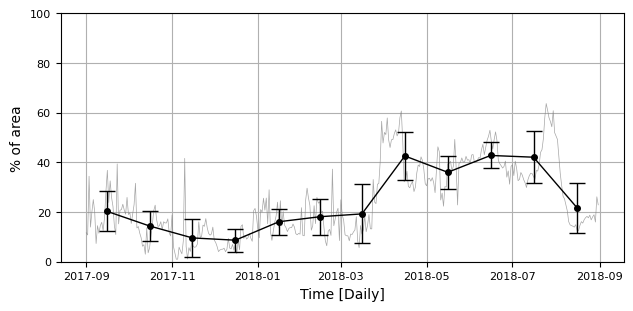

In [17]:
fig, ax = plt.subplots(
    figsize=(6.2217,3), layout = 'constrained'
)

ax.plot(Eddy_area_NJMR.time,EddyArea_time,c='grey',alpha=0.7,linewidth=0.5)
ax.errorbar(std_eddyArea.time.values,EddyArea_time.resample(time='ME').mean(),std_eddyArea,fmt='o-', color='black',markersize=4,linewidth=1, capsize=6,label='Monthly mean')
ax.set_ylim(0,100)
ax.grid()

ax.set_xlabel('Time [Daily]')
ax.set_ylabel(r'% of area')

In [18]:
from scipy import stats
res = stats.pearsonr(JMR_FWC_Sum,EJMR_FWC)
print(res,'p < 0.01: ',res[1]<0.01)
res = stats.pearsonr(JMR_FWC_Sum,OEJMR_FWC)
print(res,'p < 0.01: ',res[1]<0.01)
res = stats.pearsonr(JMR_FWC_Sum,CEJMR_FWC)
print(res,'p < 0.01: ',res[1]<0.01)

res = stats.pearsonr(JMR_FWC_Sum,EddyArea_time)
print(res,'p < 0.01: ',res[1]<0.01)

PearsonRResult(statistic=0.8265297391109052, pvalue=1.2837397397778033e-92) p < 0.01:  True
PearsonRResult(statistic=0.5016068361336233, pvalue=1.1807091857485094e-24) p < 0.01:  True
PearsonRResult(statistic=0.8876763627251338, pvalue=2.5970286429677106e-124) p < 0.01:  True
PearsonRResult(statistic=0.7515483797784792, pvalue=1.4532135168102372e-67) p < 0.01:  True


In [19]:
eddyRegion

<xarray.DataArray 'EddyDetection' (time: 365, Y: 198, X: 473)> Size: 273MB
[34183710 values with dtype=float64]
Coordinates:
  * X        (X) float64 4kB -21.98 -21.93 -21.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 2kB 70.01 70.03 70.04 70.06 ... 73.9 73.93 73.95 73.98
    XC       (Y, X) float64 749kB ...
    YC       (Y, X) float64 749kB ...
  * time     (time) datetime64[ns] 3kB 2017-09-01 2017-09-02 ... 2018-08-31
    Z        float64 8B ...
Attributes:
    unit:         Eddy type (1 == anti-cyclonic, 2 == cyclonic)
    description:  Outermost closed SSH defined eddy region

In [20]:
cond = (FWC > 2.5) & ((eddyRegion == 1)|(eddyRegion == 4))
space_corr = xr.corr(eddyRegion.where(cond),FWC,dim=['X','Y'])
time_corr = xr.corr(eddyRegion.where(cond),FWC,dim='time')

In [21]:
space_corr

<xarray.DataArray (time: 365)> Size: 3kB
array([ 5.25748897e-01,  5.34902253e-01,  5.51569731e-01,  4.73559582e-01,
        6.29017295e-01,  6.83643640e-01,  6.05889571e-01,  5.12108490e-01,
        5.12835264e-01,  5.74996651e-01,  5.46630441e-01,  6.08284654e-01,
        5.40454052e-01,  5.25618107e-01,  5.18700975e-01,  5.19993628e-01,
        5.04883626e-01,  5.35786700e-01,  5.03144937e-01,  4.50931887e-01,
        4.43970533e-01,  5.02456637e-01,  4.95405488e-01,  4.97619386e-01,
        5.59030648e-01,  4.25395188e-01,  4.66220381e-01,  5.87881162e-01,
        5.32065276e-01,  4.14563168e-01,  4.18832922e-01,  3.74058147e-01,
        3.18415135e-01,  3.64179647e-01,  3.09156375e-01,  1.76373171e-01,
        1.80886759e-01,  1.41623962e-01,  1.59286753e-01,  1.85850242e-01,
        2.46810064e-01,  1.70912959e-01,  1.64280487e-01,  1.17631309e-01,
        1.63383101e-01,  1.31242205e-01,  1.04295905e-01,  1.37844780e-01,
        9.19869831e-02,  1.27727811e-01,  1.46680490e-01,  1.69414493e-01,
        8.92942744e-02,  7.51030093e-02,  8.39870271e-02,  7.11060952e-02,
        3.79693976e-02,  1.31532728e-02, -1.03495296e-02,  4.10964790e-02,
        2.56299435e-02, -1.42956703e-02,  3.68286648e-02,  2.24528214e-02,
        2.82232961e-02, -1.42835707e-02,  1.78329271e-02,  2.10130529e-02,
        4.21541028e-02, -6.02696389e-04, -4.37024005e-02,  2.58080422e-02,
        5.84425258e-02,  4.05389514e-02,  2.80027402e-02,  4.31719179e-02,
        3.22011007e-03,  5.95264123e-02,  4.03487703e-02,  3.27424641e-02,
...
        1.17081819e-02,  1.69226096e-01,  4.99943242e-02, -2.93644025e-02,
        8.66181852e-02,  1.96294989e-01,  1.18108269e-01,  1.58871211e-01,
        1.34935543e-01,  1.88596706e-01,  2.98120752e-01,  2.12179435e-01,
        1.74677948e-01,  1.56592252e-01,  2.30362501e-01,  3.61576927e-01,
        6.80411183e-02,  4.32934032e-02,  5.27953900e-02,  3.12709504e-01,
        2.90753467e-01,  1.55817748e-01,  1.50456743e-01,  1.63881650e-01,
        2.17021863e-01,  2.86721154e-01,  3.23624724e-01,  3.05164172e-01,
        1.34437414e-01,  1.87665970e-01,  1.84567915e-01,  2.02734295e-01,
        1.83070811e-01,  1.33712486e-01,  1.70015122e-01,  2.57811752e-01,
        2.73088508e-01,  2.90431250e-01,  1.25368244e-01,  3.05978887e-01,
        2.77349783e-01,  1.44211058e-01, -4.23931609e-02,  2.87786698e-02,
        3.12614616e-01,  2.40624682e-01,  3.21683565e-01,  3.47971603e-01,
        2.81500830e-01,  1.18716900e-01,  1.47647986e-01,  2.70808464e-01,
        2.09499404e-01,  8.68840235e-02,  3.84767378e-02,  5.05207651e-02,
        1.07634514e-01,  1.34264885e-01,  2.03794036e-02,  8.95825729e-02,
        7.14032917e-02,  4.92856633e-02,  9.18274543e-03,  2.90813199e-01,
        2.98582919e-01,  4.64906363e-02,  7.91609537e-02,  2.53845856e-01,
        1.75997676e-01,  2.29044509e-01,  2.52645975e-01,  2.20442585e-01,
        2.27671665e-01,  1.94431617e-01,  2.38352643e-01,  9.96265416e-02,
        1.43757472e-01])
Coordinates:
  * time     (time) datetime64[ns] 3kB 2017-09-01 2017-09-02 ... 2018-08-31
    Z        float64 8B -1.0

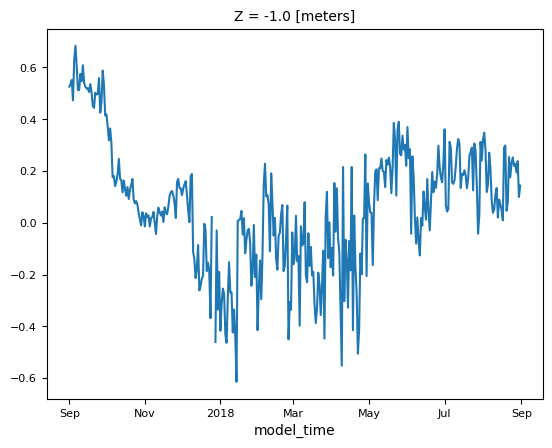

In [22]:
space_corr.plot()

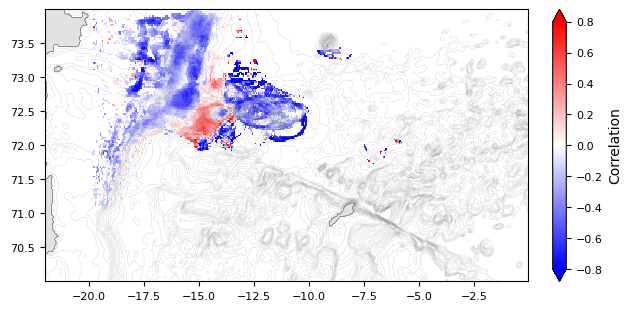

In [23]:
fig, ax = plt.subplots(
    figsize=(6.2217,3), layout = 'constrained'
)

mesh = ax.pcolormesh(time_corr.X,time_corr.Y,time_corr,vmin=-0.8,vmax=0.8,cmap='bwr')
cbar = fig.colorbar(mesh,extend='both')
cbar.set_label('Correlation')
lon = depth['XC']
lat = depth['YC']

land = depth_no_nan.where(depth_no_nan==0)

ax.pcolormesh(land.X,land.Y,land,cmap='Greys',vmin=-25,vmax=100,zorder=0)

# Add land contour
ax.contour(lon, lat, depth_no_nan, [0], colors='black', linewidths=0.25,zorder=0)
ax.contour(lon, lat, depth_no_nan, np.arange(0,3000,100), colors='grey', linewidths=0.15,alpha=0.7)

fig.savefig(f'/nird/home/ekv036/MSc/Fig/JMR_EDDY_FWC_Correlation',dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', format=None,
            transparent=False, bbox_inches=None,pad_inches=0.25)

# Case study of eddy ID with high FWC

In [24]:
case_EddyAreaID = JMREI.sel(Y=slice(72.2,72.7),X=slice(-15,-11))
case_EddyAreaID = case_EddyAreaID.assign_coords(time=JMR_FWC.time.values)
JMREI = JMREI.assign_coords(time=JMR_FWC.time.values)

In [25]:
case_EddyAreaID = case_EddyAreaID.where(JMR_FWC>=3)
case_EddyAreaID = case_EddyAreaID.fillna('0')

In [26]:
display(np.unique(case_EddyAreaID.values))

array(['0', "['15']", "['1578']", "['17']", "['17a']", "['17b']",
       "['18']", "['1979aabb', '1979babb', '1979bbbb', '1979abbb']",
       "['1979aabbb', '1979abbbb', '1979bbbbb', '2472', '1979babbb']",
       "['1979aabbb', '1979babbb', '1979bbbbb', '1979abbbb']",
       "['1979aabbb', '1979bbbbb', '1979abbbb', '1979babbb']", "['2120']",
       "['2136']", "['2191']", "['2205']", "['2209']", "['2308']",
       "['2318']", "['2449b', '2464b', '2596', '2873']",
       "['2449b', '2464b', '2596']", "['2449b', '2464b']",
       "['2449b', '2873', '2596', '2464b']", "['2460']", "['2487']",
       "['2596']", "['2613']", "['2642']", "['2900']", "['30']",
       "['3007']", "['3022']", "['3148']", "['6161']"], dtype=object)

In [27]:
with open('/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/ID_in_time.json', 'r') as f:
    ID_in_time = json.load(f)

In [28]:
display(ID_in_time[1979-1])

[[[1979], [0], [-12.165578744999994], [72.65581885499999], [195], [0]],
 [[1979], ['a'], [-12.209000324999993], [72.65581885499999], [196], [0]],
 [[1979], ['b'], [-11.515520994999992], [72.65581885499999], [196], [0]],
 [[1979], [0], [-13.080454489999996], [72.43890108], [197], [0]],
 [[1979], [0], [-13.167971574999996], [72.43890108], [198], [0]],
 [[1979, 1979],
  ['a', 'b'],
  [-11.515520994999992],
  [72.58998643999999],
  [198],
  [0]],
 [[1979, 1979],
  ['a', 'b'],
  [-11.515520994999992],
  [72.58998643999999],
  [198],
  [0]],
 [[1979, 1979],
  ['a', 'b'],
  [-11.645367309999994],
  [72.58998643999999],
  [199],
  [0]],
 [[1979, 1979],
  ['a', 'b'],
  [-11.645367309999994],
  [72.58998643999999],
  [199],
  [0]],
 [[1979, 1979],
  ['a', 'b'],
  [-11.602077389999993],
  [72.61185646999999],
  [200],
  [0]],
 [[1979, 1979],
  ['a', 'b'],
  [-11.602077389999993],
  [72.61185646999999],
  [200],
  [0]],
 [[1979, 1979],
  ['a', 'b'],
  [-11.212786989999993],
  [72.61185646999999],


In [29]:
# Convert list entries to tuples for uniqueness checks and collect unique tuples
unique_tuples = {tuple(map(tuple, sublist)) for sublist in ID_in_time[1979-1]}

# Convert unique tuples back to lists
unique_lists = [list(map(list, unique_tuple)) for unique_tuple in unique_tuples]

In [30]:
display(len(unique_lists),unique_lists)

182

[[[2472, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 2472, 1979],
  ['a',
   'abbbbb',
   'aabbbb',
   'babbbb',
   'abbbba',
   'babbba',
   'bbbbbb',
   'bbbbba',
   'b',
   'aabbba'],
  [-12.513315124999998],
  [71.65230002],
  [287],
  [0]],
 [[1979, 1979, 1979, 1979],
  ['aabba', 'babba', 'bbbba', 'abbba'],
  [-10.348850025],
  [72.146506485],
  [223],
  [0]],
 [[1979, 2472, 1979, 1979, 1979, 1979, 1979, 1979, 2472, 1979],
  ['aabbba',
   'a',
   'abbbbb',
   'aabbbb',
   'babbbb',
   'abbbba',
   'babbba',
   'bbbbbb',
   'b',
   'bbbbba'],
  [-12.469800359999995],
  [71.65230002],
  [290],
  [0]],
 [[1979, 2472, 1979, 1979, 1979, 1979, 1979, 1979, 2472, 1979],
  ['aabbba',
   'a',
   'abbbbb',
   'aabbbb',
   'babbbb',
   'abbbba',
   'babbba',
   'bbbbbb',
   'b',
   'bbbbba'],
  [-12.513315124999998],
  [71.671460565],
  [288],
  [0]],
 [[1979, 2472, 1979, 1979, 1979, 1979, 1979, 1979, 2472, 1979],
  ['aabbba',
   'a',
   'abbbbb',
   'aabbbb',
   'babbbb',
   'abbbba',
   'babb

In [31]:
for i in unique_lists:
    if i == [[1979], [0], [-12.165578744999994], [72.65581885499999], [195], [0]]:
        print('Yes',i)
        break

Yes [[1979], [0], [-12.165578744999994], [72.65581885499999], [195], [0]]


In [32]:
time = []
for timestep in unique_lists:
    time.append(timestep[-2])

time_ = np.arange(np.max(time)-np.min(time)+1)
ID_1979 = [[] for data in time_]

minTime = np.min(time)

for ID in unique_lists:
    ID_1979[int(ID[-2][0])-int(minTime)].append(ID)

[[[1979, 2472, 1979, 1979, 1979, 1979, 1979, 1979, 2472, 1979],
  ['aabbba',
   'a',
   'abbbbb',
   'aabbbb',
   'babbbb',
   'abbbba',
   'babbba',
   'bbbbbb',
   'b',
   'bbbbba'],
  [-10.867105779999994],
  [71.18737249499999],
  [364],
  [0]]]

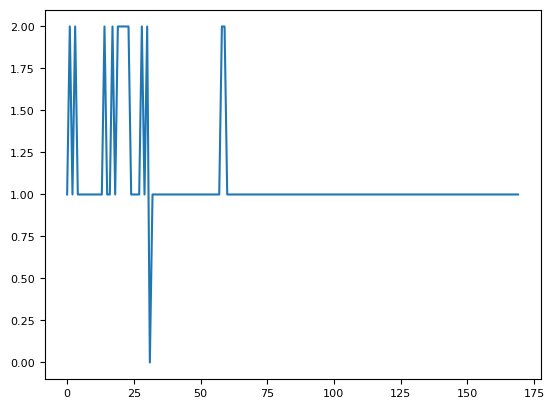

In [33]:
display(ID_1979[-1])
plt.plot([len(i) for i in ID_1979])

/tmp/ipykernel_719578/3877668092.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


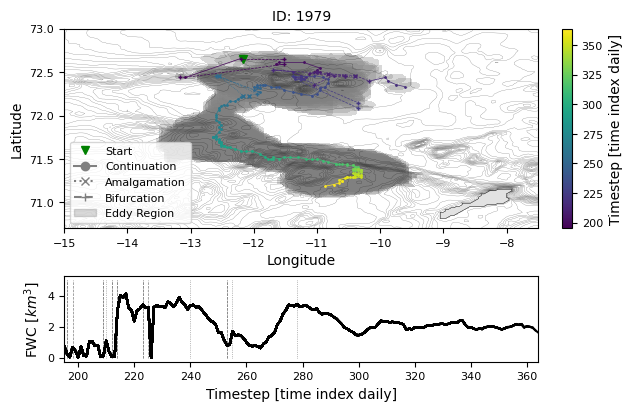

In [34]:
import matplotlib.lines as mlines

fig, (ax,ax2) = plt.subplots(2,1,
    figsize=(6.2217,4), layout = 'constrained', gridspec_kw={'height_ratios': [0.7, 0.3]}
)

cmap = cm.get_cmap('viridis')
normalize = plt.Normalize(min(subdata[-2][0] for data in ID_1979 for subdata in data), max(subdata[-2][0] for data in ID_1979 for subdata in data))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Timestep [time index daily]')
#cbar.set_ticklabels(JMR_FWC.time.values[min(subdata[-2][0] for data in ID_1979 for subdata in data):max(subdata[-2][0] for data in ID_1979 for subdata in data)+1])

lon = depth['XC']
lat = depth['YC']

land = depth_no_nan.where(depth_no_nan==0)

ax.pcolormesh(land.X,land.Y,land,cmap='Greys',vmin=-25,vmax=100,zorder=0)

# Add land contour
ax.contour(lon, lat, depth_no_nan, [0], colors='black', linewidths=0.25,zorder=0)
ax.contour(lon, lat, depth_no_nan, np.arange(0,3000,100), colors='black', linewidths=0.15,alpha=0.7)
FWC_time = [np.nan for i in range(np.max(time)-np.min(time)+1)]

for i,data in enumerate(ID_1979):
    FWC_in_time = []
    for subdata in data:
        color = cmap(normalize(subdata[-2][0]))
        if i == 0:
            ax.plot(subdata[2],subdata[3],marker='v',linestyle='',c='green',label='Start')
            eddyRegion_ID = JMREI[subdata[-2]].sel(X=subdata[2],Y=subdata[3]).values
            mask = JMREI[subdata[-2]] == eddyRegion_ID
            ax.contourf(eddyRegion.X,eddyRegion.Y,mask[0],[0.5,1.5],colors='grey',alpha=0.3)
            FWC_eddy = FWC.where(mask)*area
            FWC_eddy = FWC_eddy.sum(dim=['X','Y']).values[0]*10**(-9)
            FWC_in_time.append(FWC_eddy)
        else:

            pre = ID_1979[i-1]
            if len(pre) == 0:
                pre = ID_1979[i-2]

            # Add contourf of eddy
            eddyRegion_ID = JMREI[subdata[-2]].sel(X=subdata[2],Y=subdata[3],method='nearest').values
            mask = JMREI[subdata[-2]] == eddyRegion_ID
            eddyRegion_ID_pre = np.unique(JMREI[subdata[-2][0]-1].where(mask[0],drop=True).fillna('0'))
            all_eddyRegion_ID_pre = []
            for IDS in eddyRegion_ID_pre:
                if IDS != '0':
                    all_eddyRegion_ID_pre.append(IDS)
            
            if len(all_eddyRegion_ID_pre) == 0:
                eddyRegion_ID_pre = np.unique(JMREI[subdata[-2][0]-2].where(mask[0],drop=True).fillna('0'))
                all_eddyRegion_ID_pre = []
                for IDS in eddyRegion_ID_pre:
                    if IDS != '0':
                        all_eddyRegion_ID_pre.append(IDS)
            if eddyRegion_ID[0][0] in all_eddyRegion_ID_pre:
                if len(all_eddyRegion_ID_pre) != 1:
                    ax2.plot([subdata[-2],subdata[-2]],[0,5],linestyle=':',c='grey',linewidth=0.5)
                else:
                    pass
            else:
                ID_now = ast.literal_eval(eddyRegion_ID[0][0][0])
                ID_pre = [ast.literal_eval(X) for X in all_eddyRegion_ID_pre]

                if (len(ID_now) == len(ID_pre)) or (len(pre) == 1 and len(data) != 1):
                    ax2.plot([subdata[-2],subdata[-2]],[0,5],linestyle='--',c='grey',linewidth=0.5)
                else:
                    if len(ID_pre) == 1:
                        if len(ID_now) == len(ID_pre[0]):
                            uniq_now = np.unique(ID_now)
                            uniq_pre = np.unique(ID_pre)
                            if all(uniq_now) == all(uniq_pre):
                                pass
                            else:
                                ax2.plot([subdata[-2],subdata[-2]],[0,5],linestyle='--',c='grey',linewidth=0.5)
                    else:
                        ax2.plot([subdata[-2],subdata[-2]],[0,5],linestyle=':',c='grey',linewidth=0.5)

            ax.contourf(eddyRegion.X,eddyRegion.Y,mask[0],[0.5,1.5],colors='grey',alpha=0.3)
            FWC_eddy = FWC.where(mask)*area
            FWC_eddy = FWC_eddy.sum(dim=['X','Y']).values[0]*10**(-9)
            FWC_in_time.append(FWC_eddy)
            
        
            # Draw line from pre
            
            if len(pre) == 1 and len(data) == 1:
                ax.plot([pre[0][2],subdata[2]],[pre[0][3],subdata[3]],c=color,linewidth=0.5)
                ax.plot(subdata[2],subdata[3],marker='o',markersize=1,c=color)
            elif len(pre) == 1 and len(data) != 1:
                ax.plot([pre[0][2],subdata[2]],[pre[0][3],subdata[3]],c=color,linewidth=0.5,linestyle='--')
                ax.plot(subdata[2],subdata[3],marker='+',markersize=3,c=color)
            elif len(pre) != 1:
                connected_index = []
                for index,subpre in enumerate(pre):
                    dist = gsw.distance([subpre[2][0],subdata[2][0]],[subpre[3][0],subdata[3][0]])
                    if dist < 40000:
                        connected_index.append(index)
                if len(connected_index) != 0:
                    if len(connected_index) == 1:
                        ax.plot([pre[connected_index[0]][2],subdata[2]],[pre[connected_index[0]][3],subdata[3]],c=color,linewidth=0.5)
                        ax.plot(subdata[2],subdata[3],marker='o',markersize=1,c=color)
                    else:
                        for index,subpre in enumerate(pre):
                            if any(connected_index) == index:
                                ax.plot([subpre[2],subdata[2]],[subpre[3],subdata[3]],c=color,linewidth=0.5,linestyle='dotted')
                                ax.plot(subdata[2],subdata[3],marker='x',markersize=3,c=color)
    FWC_time[i] = np.sum(FWC_in_time)
    try:
        ax2.plot(np.arange(np.min(time),np.max(time)+1),FWC_time,c='k')
    except:
        display(np.arange(np.min(time),subdata[-2][0]+1),FWC_time,FWC_in_time)
        display(len(np.arange(np.min(time),subdata[-2][0]+1)),len(FWC_time))
        ax2.plot(np.arange(np.min(time),subdata[-2][0]+1),FWC_time,c='k')

    ax.set_xlim(-15,-7.5)
    ax.set_ylim(70.7,73)
    ax.set_title('ID: 1979')

    ax2.set_xlim(np.arange(np.min(time),np.max(time)+1)[0],np.arange(np.min(time),np.max(time)+1)[-1])
    ax2.set_ylabel('FWC [$km^{3}$]')
    ax2.set_xlabel('Timestep [time index daily]')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    solid_line = mlines.Line2D([], [], color='grey', linestyle='-', marker='o', label='Continuation')
    dotted_line = mlines.Line2D([], [], color='grey', linestyle=':', marker='x', label='Amalgamation')
    dashed_line = mlines.Line2D([], [], color='grey', linestyle='--', marker='+', label='Bifurcation')
    start_marker = mlines.Line2D([], [], color='green', marker='v', linestyle='', label='Start')
    grey_patch = mpatches.Patch(color='grey', alpha=0.3, label='Eddy Region')


    ax.legend(loc='lower left',handles=[start_marker ,solid_line, dotted_line, dashed_line,grey_patch])
    fig.savefig(f'/nird/home/ekv036/MSc/Fig/EddyTracking/ID1979/ID1979_{i}',dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', format=None,
            transparent=False, bbox_inches=None,pad_inches=0.25)





fig.savefig(f'/nird/home/ekv036/MSc/Fig/EddyTracking/ID1979_full',dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', format=None,
            transparent=False, bbox_inches=None,pad_inches=0.25)


(70.5, 73.99626027999997)

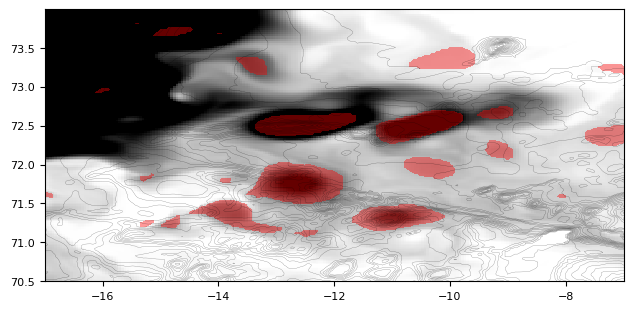

In [35]:
fig, ax = plt.subplots(
    figsize=(6.2217,3), layout = 'constrained'
)
land = depth_no_nan.where(depth_no_nan==0)

ax.pcolormesh(land.X,land.Y,land,cmap='Greys',vmin=-25,vmax=100,zorder=0)
ax.pcolormesh(FWC.X,FWC.Y,FWC[275],vmin=0,vmax=2,cmap='binary')

ax.contour(lon, lat, depth_no_nan, [0], colors='black', linewidths=0.25,zorder=0)
ax.contour(lon, lat, depth_no_nan, np.arange(0,3000,150), colors='black', linewidths=0.15,alpha=0.7)

ax.contourf(eddyRegion.X,eddyRegion.Y,eddyRegion[275],[0.5,1.5],colors='red',alpha=0.4)
ax.set_xlim(-17,-7)
ax.set_ylim(70.5)

In [36]:
from PIL import Image
import os

# Define the folder containing the PNG files and the output GIF file
input_folder = '/nird/home/ekv036/MSc/Fig/EddyTracking/ID1979'
output_gif = '/nird/home/ekv036/MSc/Animations/ID_1979.gif'

# Get a list of all PNG files in the folder
png_files = [f for f in os.listdir(input_folder) if f.endswith('.png')]

# Extract numeric index from file name and sort accordingly
png_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

# Open the images and store them in a list
images = [Image.open(os.path.join(input_folder, file)) for file in png_files]

# Save the images as a GIF
images[0].save(output_gif, save_all=True, append_images=images[1:], optimize=False, duration=200, loop=0)

print(f"GIF saved as {output_gif}")


GIF saved as /nird/home/ekv036/MSc/Animations/ID_1979.gif
